In [ ]:
medical_chrages_url = "https://raw.githubusercontent.com/JovianML/opendatasets/master/data/medical-charges.csv"
from urllib.request import urlretrieve
urlretrieve(medical_chrages_url, "medical.csv")

('medical.csv', <http.client.HTTPMessage at 0x79c4574cfc10>)

In [ ]:
import pandas as pd
medical_df = pd.read_csv("medical.csv")
medical_df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
medical_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
medical_df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


# Exploratory Analysis and Visualization

In [ ]:
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
medical_df.age.describe() # might want to histogram

,age
count,1338.000000
mean,39.207025
std,14.049960
min,18.000000
25%,27.000000
50%,39.000000
75%,51.000000
max,64.000000


In [ ]:
medical_df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


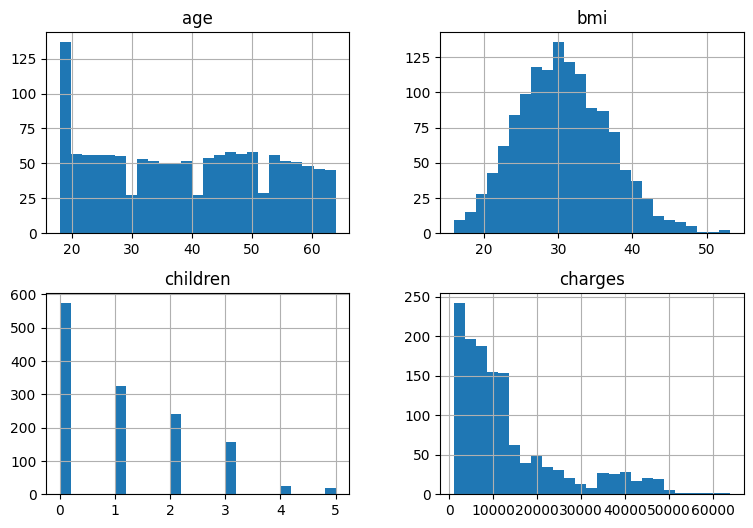

In [ ]:
import matplotlib.pyplot as plt
medical_df.hist(bins=25, figsize=(9,6))
plt.show()

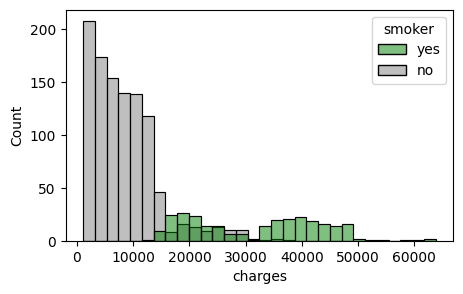

In [ ]:
plt.figure(figsize=(5, 3))
sns.histplot(data=medical_df, x="charges", hue="smoker",
             palette={"yes": "green", "no": "grey"})
plt.show()

In [ ]:
medical_df.smoker.value_counts()

,count
smoker,
no,1064
yes,274


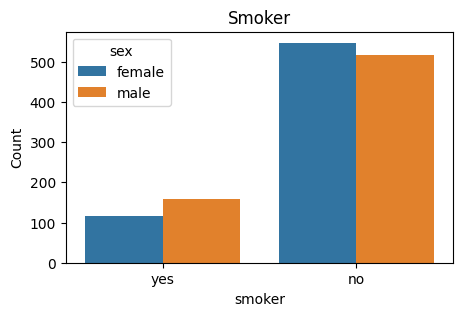

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(5,3))
sns.countplot(data=medical_df, x="smoker", hue="sex")
plt.title("Smoker")
plt.xlabel("smoker")
plt.ylabel("Count")
plt.show()

In [ ]:
medical_df.corr(numeric_only=True).charges

,charges
age,0.299008
bmi,0.198341
children,0.067998
charges,1.000000


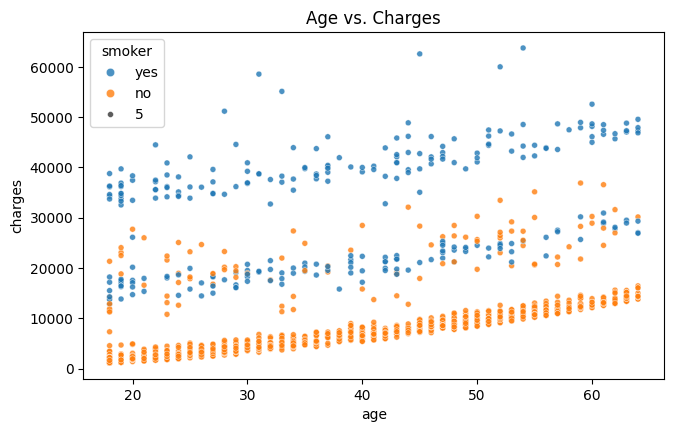

In [ ]:
plt.figure(figsize=(7.5, 4.5))
sns.scatterplot(data=medical_df,
                x='age',
                y='charges',
                hue='smoker',
                alpha=0.8,
                size=5)
plt.title('Age vs. Charges')
plt.xlabel('age')
plt.ylabel('charges')
plt.show()

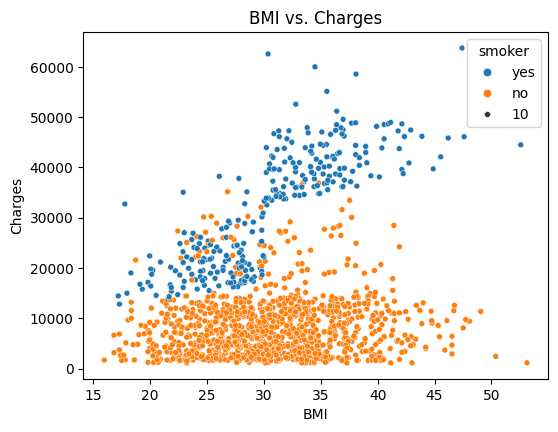

In [ ]:
plt.figure(figsize=(6,4.5))
sns.scatterplot(medical_df,
                x="bmi",
                y="charges",
                hue="smoker",
                size=10)
plt.title("BMI vs. Charges")
plt.xlabel("BMI")
plt.ylabel("Charges")
plt.show()

# Correlation

In [ ]:
correlation_matrix = medical_df.corr(numeric_only=True)
correlation_matrix

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


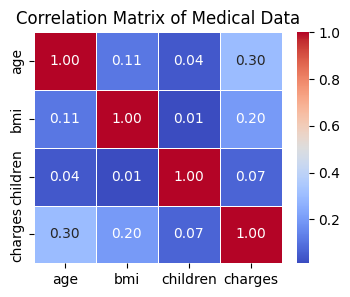

In [ ]:
plt.figure(figsize=(4, 3))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Medical Data')
plt.show()

# Implementation of Linear Regression using a Single Feature

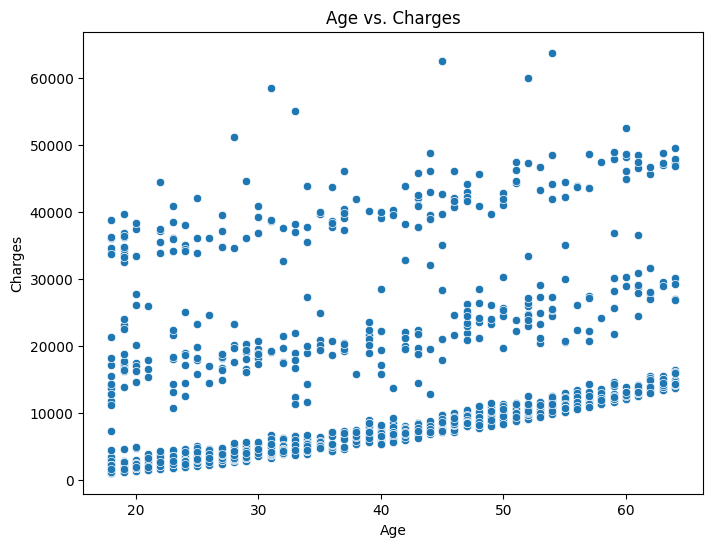

In [ ]:
non_smoker_df = medical_df[medical_df.smoker == "no"]

plt.figure(figsize=(8,6))
sns.scatterplot(medical_df,
                x="age",
                y="charges")

plt.title("Age vs. Charges")
plt.xlabel("Age")
plt.ylabel("Charges")
plt.show()

In [ ]:
def estimate_charges(age, w, b):
  return w *age + b

In [ ]:
w = 50
b = 100

In [ ]:
ages = non_smoker_df.age
estimated_charges = estimate_charges(ages, w, b).rename("charges")
estimated_charges

,charges
1,1000
2,1500
3,1750
4,1700
5,1650
...,...
1332,2700
1333,2600
1334,1000
1335,1000


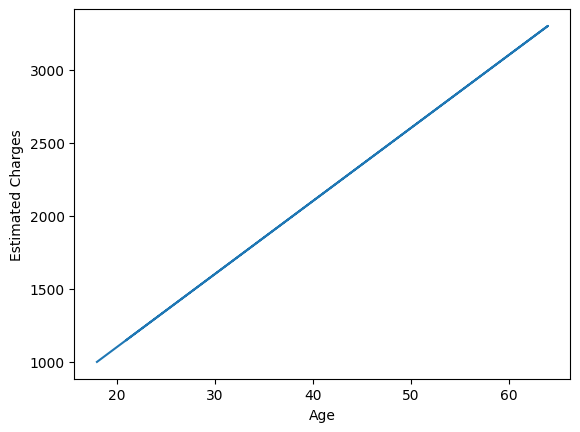

In [ ]:
plt.plot(ages, estimated_charges)
plt.xlabel("Age")
plt.ylabel("Estimated Charges")
plt.show()

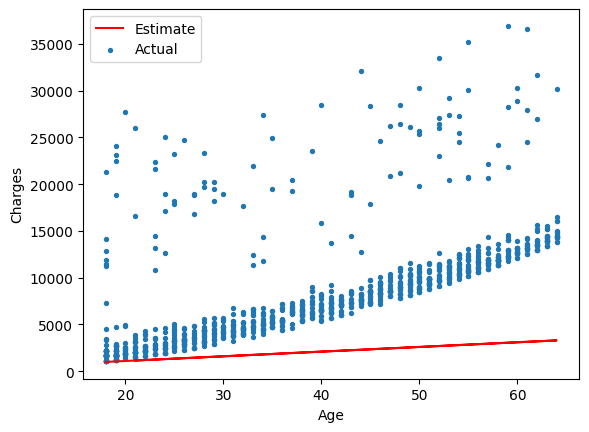

In [ ]:
target = non_smoker_df.charges
plt.plot(ages, estimated_charges, "r")
plt.scatter(ages, target, s=8)

plt.xlabel("Age")
plt.ylabel("Charges")
plt.legend(["Estimate", "Actual"])
plt.show()

In [ ]:
def try_parameters(w, b):
  ages = non_smoker_df.age
  target = non_smoker_df.charges

  estimated_charges = estimate_charges(ages, w, b)

  plt.plot(ages, estimated_charges, 'r')
  plt.scatter(ages, target, s=8)
  plt.xlabel("Age")
  plt.ylabel("Charges")
  plt.legend(["Estimate", "Actual"])

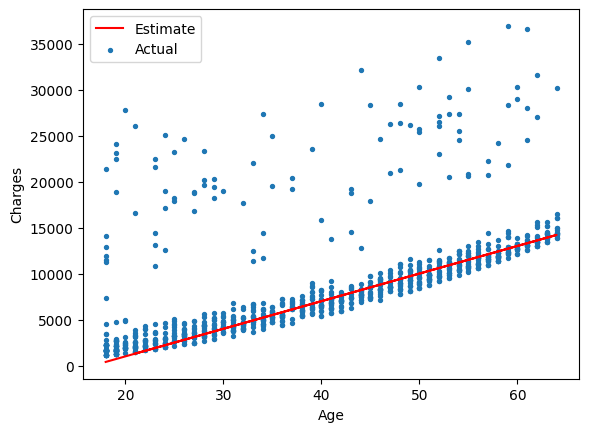

In [ ]:
try_parameters(300, -5000)

## Cost Function

In [ ]:
targets = non_smoker_df.charges
targets

,charges
1,1725.55230
2,4449.46200
3,21984.47061
4,3866.85520
5,3756.62160
...,...
1332,11411.68500
1333,10600.54830
1334,2205.98080
1335,1629.83350


In [ ]:
predictions = estimated_charges
predictions

,charges
1,1000
2,1500
3,1750
4,1700
5,1650
...,...
1332,2700
1333,2600
1334,1000
1335,1000


In [ ]:
import numpy as np

def rmse(targets, predictions):
  return np.sqrt(np.mean(np.square(targets-predictions)))

In [ ]:
w = 50
b = 100

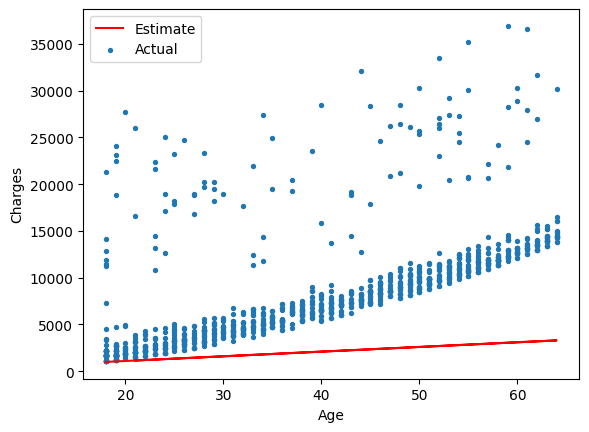

In [ ]:
try_parameters(w, b)

In [ ]:
targets = non_smoker_df["charges"]
predicted = estimate_charges(non_smoker_df.age, w, b)

In [ ]:
rmse(targets, predicted)

np.float64(8461.949562575493)

In [ ]:
def try_parameters(w, b):
  ages = non_smoker_df.age
  target = non_smoker_df.charges

  estimated_charges = estimate_charges(ages, w, b)

  plt.plot(ages, estimated_charges, 'r')
  plt.scatter(ages, target, s=8)
  plt.xlabel("Age")
  plt.ylabel("Charges")
  plt.legend(["Estimate", "Actual"])

  loss = rmse(targets, predictions)
  print("RMSE LOSS: ", loss)

RMSE LOSS:  8461.949562575493


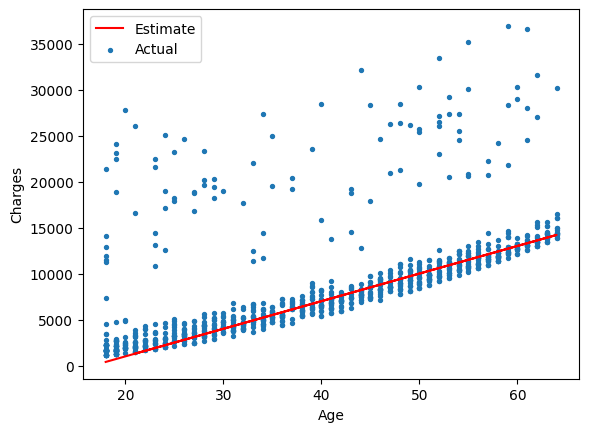

In [ ]:
try_parameters(300, -5000)

# Linear Regression using Scikit-Learn

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
model = LinearRegression()

In [ ]:
help(model.fit)

Help on method fit in module sklearn.linear_model._base:

fit(X, y, sample_weight=None) method of sklearn.linear_model._base.LinearRegression instance
    Fit linear model.
    
    Parameters
    ----------
    X : {array-like, sparse matrix} of shape (n_samples, n_features)
        Training data.
    
    y : array-like of shape (n_samples,) or (n_samples, n_targets)
        Target values. Will be cast to X's dtype if necessary.
    
    sample_weight : array-like of shape (n_samples,), default=None
        Individual weights for each sample.
    
        .. versionadded:: 0.17
           parameter *sample_weight* support to LinearRegression.
    
    Returns
    -------
    self : object
        Fitted Estimator.



In [ ]:
inputs = non_smoker_df[["age"]]
targets = non_smoker_df.charges
print("inputs.shape:", inputs.shape)
print("targets.shape:", targets.shape)

inputs.shape: (1064, 1)
targets.shape: (1064,)


In [ ]:
model.fit(inputs, targets)
model

LinearRegression()

In [ ]:
model.predict(np.array([[23],
                        [37],
                        [61]]))

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([ 4055.30443855,  7796.78921819, 14210.76312614])

In [ ]:
new_data = pd.DataFrame([[23],[37],[61]], columns=["age"])
model.predict(new_data)

array([ 4055.30443855,  7796.78921819, 14210.76312614])

In [ ]:
predictions = model.predict(inputs)
predictions

array([2719.0598744 , 5391.54900271, 6727.79356686, ..., 2719.0598744 ,
       2719.0598744 , 3520.80661289])

In [ ]:
targets

,charges
1,1725.55230
2,4449.46200
3,21984.47061
4,3866.85520
5,3756.62160
...,...
1332,11411.68500
1333,10600.54830
1334,2205.98080
1335,1629.83350


In [ ]:
rmse(targets, predictions)

np.float64(4662.505766636395)

In [ ]:
model.coef_

array([267.24891283])

In [ ]:
model.intercept_

np.float64(-2091.4205565650864)

RMSE LOSS:  4662.505766636395


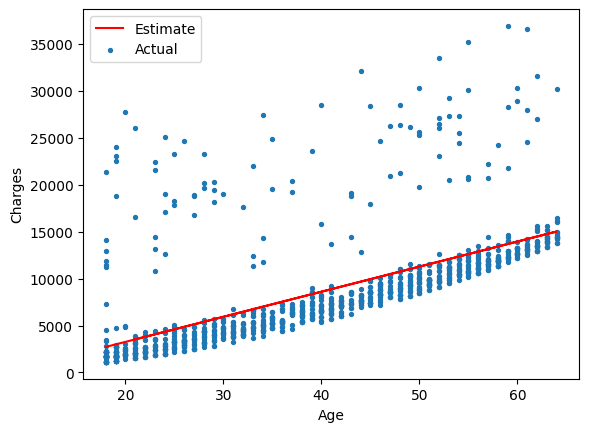

In [ ]:
try_parameters(267.24891283, -2091.4205565650864)

# SGD Regressor

In [ ]:
from sklearn.linear_model import SGDRegressor
model = SGDRegressor()
model.fit(inputs, targets)
predictions = model.predict(inputs)

In [ ]:
rmse(targets, predictions)

np.float64(4934.201524111622)

In [ ]:
model.coef_

array([287.13497823])

In [ ]:
model.intercept_

array([-4464.93011621])

# Simple ML Model Steps

In [ ]:
inputs, targets = non_smoker_df[["age"]], non_smoker_df["charges"]

model = LinearRegression().fit(inputs, targets)

predictions = model.predict(inputs)

loss = rmse(targets, predictions)
print(f"Loss: {loss}")

Loss: 4662.505766636395


# Linear Regression using Multiple Features

In [ ]:
inputs, targets = non_smoker_df[["age", "bmi"]], non_smoker_df["charges"]
model = LinearRegression().fit(inputs, targets)
predictions = model.predict(inputs)
loss = rmse(targets, predictions)
print(f"Loss: ", loss)

Loss:  4662.3128354612945


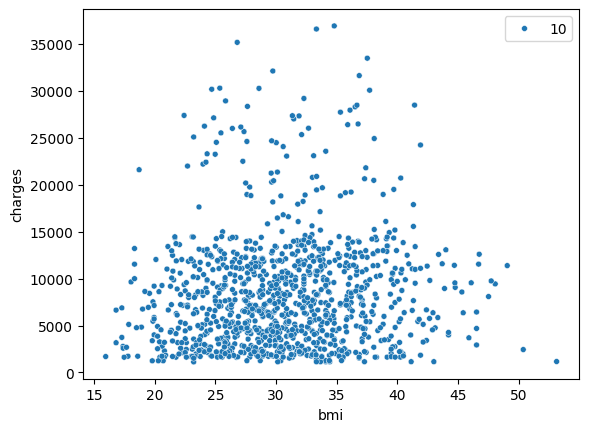

In [ ]:
sns.scatterplot(non_smoker_df,
                x="bmi",
                y="charges",
                size=10)
plt.show()

In [ ]:
model.coef_, model.intercept_

(array([266.87657817,   7.07547666]), np.float64(-2293.6320906488727))

<Axes: xlabel='children', ylabel='charges'>

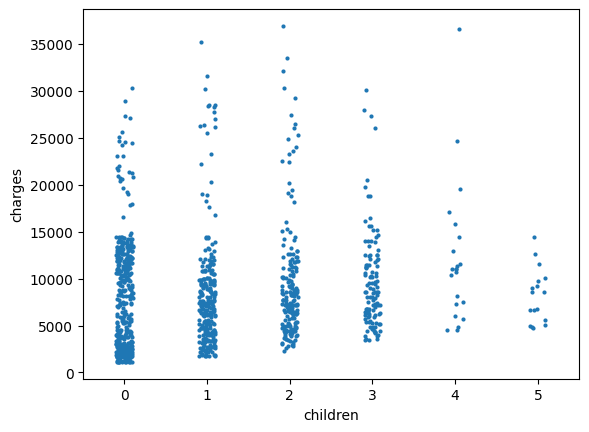

In [ ]:
sns.stripplot(non_smoker_df,
              x="children",
              y="charges",
              size=3)

In [ ]:
inputs, targets = medical_df[["age", "bmi", "children"]], medical_df["charges"]
model = LinearRegression().fit(inputs, targets)
predictions = model.predict(inputs)
rmse(targets, predictions)
# So off because we ignore smoker and non-smoker

np.float64(11355.317901125973)

# Using Categorical Features for Machine Learning

1. two categories --> 0 and 1
2. more than 2 categories --> one-hot encoding
3. natural order --> (e.g. 1, 2, 3, 4)

<Axes: xlabel='smoker', ylabel='charges'>

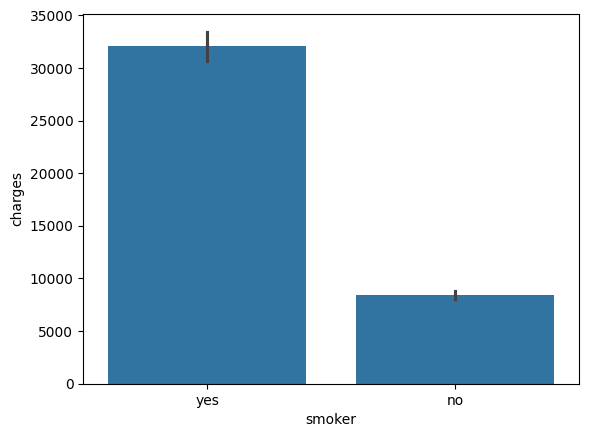

In [ ]:
sns.barplot(data=medical_df, x="smoker", y="charges")

In [ ]:
smoker_codes = {"no": 0, "yes": 1}
medical_df["smoker_code"] = medical_df["smoker"].map(smoker_codes)

In [ ]:
medical_df.charges.corr(medical_df.smoker_code)

np.float64(0.787251430498478)

In [ ]:
medical_df

,age,sex,bmi,children,smoker,region,charges,smoker_code
0,19,female,27.900,0,yes,southwest,16884.92400,1
1,18,male,33.770,1,no,southeast,1725.55230,0
2,28,male,33.000,3,no,southeast,4449.46200,0
3,33,male,22.705,0,no,northwest,21984.47061,0
4,32,male,28.880,0,no,northwest,3866.85520,0
...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,0
1334,18,female,31.920,0,no,northeast,2205.98080,0
1335,18,female,36.850,0,no,southeast,1629.83350,0
1336,21,female,25.800,0,no,southwest,2007.94500,0


In [ ]:
inputs, targets = medical_df[["age", "bmi", "children", "smoker_code"]], medical_df["charges"]

model = LinearRegression().fit(inputs, targets)

predictions = model.predict(inputs)

loss = rmse(targets, predictions)
print(loss)

6056.439217188081


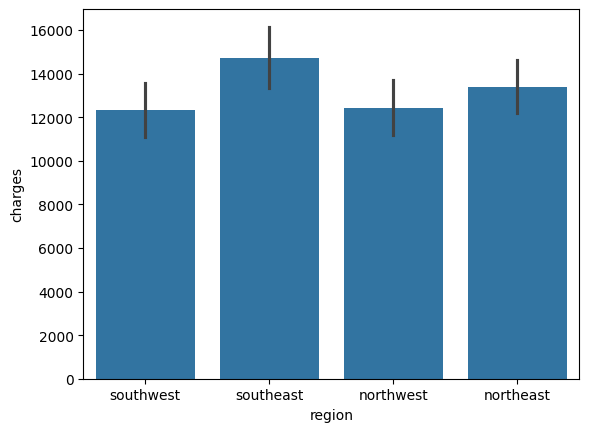

In [ ]:
sns.barplot(data=medical_df,
            x='region',
            y='charges')
plt.show()

In [ ]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
enc.fit(medical_df[["region"]])
enc.categories_

[array(['northeast', 'northwest', 'southeast', 'southwest'], dtype=object)]

In [ ]:
one_hot = enc.transform(medical_df[["region"]]).toarray()
one_hot

array([[0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       ...,
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.]])

In [ ]:
medical_df[["region"]]

,region
0,southwest
1,southeast
2,southeast
3,northwest
4,northwest
...,...
1333,northwest
1334,northeast
1335,southeast
1336,southwest


In [ ]:
region_cols = enc.get_feature_names_out(["region"])
medical_df[region_cols] = one_hot

In [ ]:
medical_df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges',
       'smoker_code', 'region_northeast', 'region_northwest',
       'region_southeast', 'region_southwest'],
      dtype='object')

In [ ]:
input_cols = ['age', 'bmi', 'children', 'smoker_code', 'region_northeast', 'region_northwest',
       'region_southeast', 'region_southwest']
inputs, targets = medical_df[input_cols], medical_df['charges']
model = LinearRegression().fit(inputs, targets)
predictions = model.predict(inputs)
rmse(targets, predictions)

np.float64(6042.033215394104)

## Create two separate models

### Non-Smoker

In [ ]:
input_cols = ['age', 'bmi','children','region_northeast', 'region_northwest',
       'region_southeast', 'region_southwest']
inputs, targets = medical_df[medical_df["smoker_code"] == 0][input_cols], medical_df[medical_df["smoker_code"] == 0]["charges"]

In [ ]:
model = LinearRegression().fit(inputs, targets)
model.fit(inputs, targets)
predictions = model.predict(inputs)
print(rmse(targets, predictions))

4580.614774952145


In [ ]:
model.coef_

array([ 264.947362  ,   17.93903022,  586.90294069,  731.98146285,
        179.73250121, -257.71997205, -653.99399201])

### Smoker

In [ ]:
input_cols = ['age', 'bmi','children','region_northeast', 'region_northwest',
       'region_southeast', 'region_southwest']
inputs, targets = medical_df[medical_df["smoker_code"] == 1][input_cols], medical_df[medical_df["smoker_code"] == 1]["charges"]

In [ ]:
model = LinearRegression().fit(inputs, targets)
model.fit(inputs, targets)
predictions = model.predict(inputs)
print(rmse(targets, predictions))

5671.590208557808


In [ ]:
model.coef_

array([  267.62012784,  1471.17770367,   168.99036227,   749.13330562,
          90.93727093, -1139.20093135,   299.1303548 ])

# Model Improvements

In [ ]:
pd.DataFrame(model.coef_, columns=["weight"], index=[input_cols])
# notice that it is completely off from what we observed

,weight
age,267.620128
bmi,1471.177704
children,168.990362
region_northeast,749.133306
region_northwest,90.937271
region_southeast,-1139.200931
region_southwest,299.130355


In [ ]:
model.intercept_

np.float64(-23510.148543120387)

In [ ]:
medical_df

,age,sex,bmi,children,smoker,region,charges,smoker_code,region_northeast,region_northwest,region_southeast,region_southwest
0,19,female,27.900,0,yes,southwest,16884.92400,1,0.0,0.0,0.0,1.0
1,18,male,33.770,1,no,southeast,1725.55230,0,0.0,0.0,1.0,0.0
2,28,male,33.000,3,no,southeast,4449.46200,0,0.0,0.0,1.0,0.0
3,33,male,22.705,0,no,northwest,21984.47061,0,0.0,1.0,0.0,0.0
4,32,male,28.880,0,no,northwest,3866.85520,0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,0,0.0,1.0,0.0,0.0
1334,18,female,31.920,0,no,northeast,2205.98080,0,1.0,0.0,0.0,0.0
1335,18,female,36.850,0,no,southeast,1629.83350,0,0.0,0.0,1.0,0.0
1336,21,female,25.800,0,no,southwest,2007.94500,0,0.0,0.0,0.0,1.0


In [ ]:
from sklearn.preprocessing import StandardScaler

numeric_cols = ['age', 'bmi', 'children']
scaler = StandardScaler()
scaler.fit(medical_df[numeric_cols])

StandardScaler()

In [ ]:
scaler.mean_

array([39.20702541, 30.66339686,  1.09491779])

In [ ]:
scaler.var_

array([197.25385199,  37.16008997,   1.45212664])

In [ ]:
scaled_inputs = scaler.transform(medical_df[numeric_cols])
scaled_inputs

array([[-1.43876426, -0.45332   , -0.90861367],
       [-1.50996545,  0.5096211 , -0.07876719],
       [-0.79795355,  0.38330685,  1.58092576],
       ...,
       [-1.50996545,  1.0148781 , -0.90861367],
       [-1.29636188, -0.79781341, -0.90861367],
       [ 1.55168573, -0.26138796, -0.90861367]])

In [ ]:
cat_cols = ['smoker_code', 'region_northeast', 'region_northwest', 'region_southeast', 'region_southwest']
categorical_data = medical_df[cat_cols].values
categorical_data

array([[1., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       ...,
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.],
       [1., 0., 1., 0., 0.]])

In [ ]:
import numpy as np
inputs = np.concatenate((scaled_inputs, categorical_data), axis=1)
targets = medical_df.charges
pd.DataFrame(inputs, columns=['age', 'bmi', 'children', 'smoker_code', 'region_northeast', 'region_northwest', 'region_southeast', 'region_southwest'])

,age,bmi,children,smoker_code,region_northeast,region_northwest,region_southeast,region_southwest
0,-1.438764,-0.453320,-0.908614,1.0,0.0,0.0,0.0,1.0
1,-1.509965,0.509621,-0.078767,0.0,0.0,0.0,1.0,0.0
2,-0.797954,0.383307,1.580926,0.0,0.0,0.0,1.0,0.0
3,-0.441948,-1.305531,-0.908614,0.0,0.0,1.0,0.0,0.0
4,-0.513149,-0.292556,-0.908614,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...
1333,0.768473,0.050297,1.580926,0.0,0.0,1.0,0.0,0.0
1334,-1.509965,0.206139,-0.908614,0.0,1.0,0.0,0.0,0.0
1335,-1.509965,1.014878,-0.908614,0.0,0.0,0.0,1.0,0.0
1336,-1.296362,-0.797813,-0.908614,0.0,0.0,0.0,0.0,1.0


In [ ]:
model = LinearRegression().fit(inputs, targets)
predictions = model.predict(inputs)
loss = rmse(targets, predictions)
print(loss)

6042.033215394104


In [ ]:
weights_df = pd.DataFrame({
    'feature': numeric_cols + cat_cols + ["intercept"],
    'weight': np.append(model.coef_, model.intercept_)
})
weights_df.sort_values('weight', ascending=False)

,feature,weight
3,smoker_code,23836.300502
8,intercept,8402.640125
0,age,3609.119197
1,bmi,2064.468352
4,region_northeast,586.479228
2,children,571.872609
5,region_northwest,234.297116
7,region_southwest,-372.895445
6,region_southeast,-447.880899


The Most Important Features are:
1. Smoker Code
2. Age
3. BMI

* remember to scale the data before using it